# Flexibility Analysis for the Sugarcane Mill Model

This notebook reads in historical price data for flexibility analysis of sugarcane mill model. The sensitivty of the expected value of the mill's profit to different levels of operational flexibility is studied.

In [1]:
from stochastic_model_v2 import *
import matplotlib.pyplot as plt
import pandas as pd

# from perfect_information_analysis import *
# from technology_sensitivity import *
from pathlib import Path  
from flexibility_analysis import *

In [5]:
#Load historical price data
df_hp = pd.read_excel('Mutran_jet_datav2.xlsx', sheet_name= 'Inflation')

#Convert data frame to indexed dictionary and add the premium to SAF
jet_price = df_hp['p_je']
eth_price = df_hp['p_et']
sugar_price = df_hp['p_su']


jet_price = jet_price.to_dict()
eth_price = eth_price.to_dict()
sugar_price = sugar_price.to_dict()

market_prices = {}
market_prices['s'] = sugar_price
market_prices['e'] = eth_price
market_prices['a'] = jet_price

scenarios = list(sugar_price.keys())

In [75]:
ethanol_split_flex = np.linspace(0,1,11)
juice_split_flex = np.linspace(0,1,11)

conv = 0.409
cost = 637

# data = flexibility_data_gen(ethanol_split_flex,juice_split_flex,cost,conv,2585,market_prices,scenarios)

# #Save profit to csv
# filepath = Path('C:/Users/Maddie1/Documents/GitHub/C2C_Project/A_Case_For_Biojet_in_BR/flexibility_data/profit.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# data[0].to_csv(filepath,encoding='utf-8')

# #Save theta to csv
# filepath = Path('C:/Users/Maddie1/Documents/GitHub/C2C_Project/A_Case_For_Biojet_in_BR/flexibility_data/theta.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# data[1].to_csv(filepath,encoding='utf-8')

# #Save gamma to csv
# filepath = Path('C:/Users/Maddie1/Documents/GitHub/C2C_Project/A_Case_For_Biojet_in_BR/flexibility_data/gamma.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# data[2].to_csv(filepath,encoding='utf-8')

In [8]:
df_profit = pd.read_csv('C:/Users/Maddie1/Documents/GitHub/C2C_Project/A_Case_For_Biojet_in_BR/flexibility_data/profit.csv')

df_profit = df_profit.drop(columns = ['Unnamed: 0'])

df_theta = pd.read_csv('C:/Users/Maddie1/Documents/GitHub/C2C_Project/A_Case_For_Biojet_in_BR/flexibility_data/theta.csv')
df_gamma = pd.read_csv('C:/Users/Maddie1/Documents/GitHub/C2C_Project/A_Case_For_Biojet_in_BR/flexibility_data/gamma.csv')

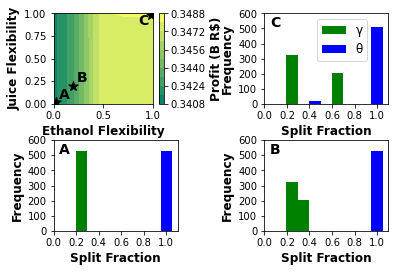

In [74]:
fig, axs = plt.subplots(2, 2)

#upper left - heat map
cntr = axs[0,0].contourf(ethanol_split_flex,juice_split_flex,df_profit.to_numpy()/1e9, cmap='summer',levels=10)
cbar=fig.colorbar(cntr, ax = axs[0,0])
axs[0,0].scatter(0.98,0.98,color = 'k', marker='*', s = 100)
# plt.scatter(0.5,0.5,color = 'k', marker='*', s = 100)
axs[0,0].scatter(0.2,0.2,color = 'k', marker='*', s = 100)
axs[0,0].scatter(0.02,0.02,color = 'k', marker='*', s = 100)
axs[0,0].text(0.05,0.06,'A', fontsize = 14, fontweight='bold')
axs[0,0].text(0.23,0.24,'B', fontsize = 14, fontweight='bold')
axs[0,0].text(0.85,0.87,'C', fontsize = 14, fontweight='bold')
axs[0,0].set_xlabel('Ethanol Flexibility', fontweight='bold', fontsize = 12)
axs[0,0].set_ylabel('Juice Flexibility', fontweight='bold', fontsize = 12)
cbar.set_label('Profit (B R$)',weight = 'bold', fontsize=12)

#Upper right
df_gamma['10.10'] = df_gamma['10.10'].drop(index=0)
df_theta['10.10'] = df_theta['10.10'].drop(index=0)
axs[0,1].hist(df_gamma['10.10'], label='\u03B3',bins = [0.19,0.3,0.6,0.7], color = 'green')
axs[0,1].hist(df_theta['10.10'],label='\u03B8', bins = [0.4,0.5,0.95,1.05], color = 'blue')
axs[0,1].text(0.05,510,'C', fontsize = 14, fontweight='bold')
axs[0,1].set_yticks([0,100,200,300,400,500,600])
axs[0,1].set_xlim(left = 0, right=1.1)
axs[0,1].set_xticks([0,0.2,.40,.60,.80,1])
axs[0,1].legend(bbox_to_anchor=(0.88, 1), fontsize = 12)
axs[0,1].set_xlabel('Split Fraction', fontweight='bold', fontsize = 12)
axs[0,1].set_ylabel('Frequency', fontweight='bold',fontsize = 12)

#Bottom left
df_gamma['0'] = df_gamma['0'].drop(index=0)
df_theta['0'] = df_theta['0'].drop(index=0)
axs[1,0].hist(df_gamma['0'], label='Ethanol',bins = 10, color = 'green')
axs[1,0].hist(df_theta['0'],label='Juice', bins = [0.95,1.05], color = 'blue')
axs[1,0].text(0.05,510,'A', fontsize = 14, fontweight='bold')
axs[1,0].set_yticks([0,100,200,300,400,500,600])
axs[1,0].set_xlim(left = 0, right=1.1)
axs[1,0].set_xticks([0,0.2,.40,.60,.80,1])
# axs[0,1].legend(bbox_to_anchor=(0.88, 1), fontsize = 10)
axs[1,0].set_xlabel('Split Fraction', fontweight='bold', fontsize = 12)
axs[1,0].set_ylabel('Frequency', fontweight='bold',fontsize = 12)

#Bottom right
df_gamma['2.2'] = df_gamma['2.2'].drop(index=0)
df_theta['2.2'] = df_theta['2.2'].drop(index=0)
axs[1,1].hist(df_gamma['2.2'], label='Ethanol',bins = [0.19,0.3,0.4], color = 'green')
axs[1,1].hist(df_theta['2.2'],label='Juice', bins = [0.95,1.05], color = 'blue')
axs[1,1].text(0.05,510,'B', fontsize = 14, fontweight='bold')
axs[1,1].set_yticks([0,100,200,300,400,500,600])
axs[1,1].set_xlim(left = 0, right=1.1)
axs[1,1].set_xticks([0,0.2,.40,.60,.80,1])
# axs[,1].legend(bbox_to_anchor=(0.88, 1), fontsize = 10)
axs[1,1].set_xlabel('Split Fraction', fontweight='bold', fontsize = 12)
axs[1,1].set_ylabel('Frequency', fontweight='bold',fontsize = 12)


plt.subplots_adjust(wspace = 0.7, hspace = 0.4)
plt.savefig('4panel.png',bbox_inches='tight',dpi=400)
plt.show()

In [57]:
#Run flexibility analysis for the optimistic case
conv = 0.61
cost = 461

#Uncomment to run flexibility analysis
# data_opt = flexibility_data_gen(ethanol_split_flex,juice_split_flex,conv,cost,2585,market_prices,scenarios)

# #Save profit to csv
# filepath = Path('C:/Users/Maddie1/Documents/GitHub/C2C_Project/A_Case_For_Biojet_in_BR/flexibility_data_opt/profit.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# data_opt[0].to_csv(filepath,encoding='utf-8')

# #Save theta to csv
# filepath = Path('C:/Users/Maddie1/Documents/GitHub/C2C_Project/A_Case_For_Biojet_in_BR/flexibility_data_opt/theta.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# data_opt[1].to_csv(filepath,encoding='utf-8')

# #Save gamma to csv
# filepath = Path('C:/Users/Maddie1/Documents/GitHub/C2C_Project/A_Case_For_Biojet_in_BR/flexibility_data_opt/gamma.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# data_opt[2].to_csv(filepath,encoding='utf-8')

In [12]:
df_profit_opt = pd.read_csv('C:/Users/Maddie1/Documents/GitHub/C2C_Project/A_Case_For_Biojet_in_BR/flexibility_data_opt/profit.csv')

df_profit_opt = df_profit_opt.drop(columns = ['Unnamed: 0'])

df_theta_opt = pd.read_csv('C:/Users/Maddie1/Documents/GitHub/C2C_Project/A_Case_For_Biojet_in_BR/flexibility_data_opt/theta.csv')
df_gamma_opt = pd.read_csv('C:/Users/Maddie1/Documents/GitHub/C2C_Project/A_Case_For_Biojet_in_BR/flexibility_data_opt/gamma.csv')

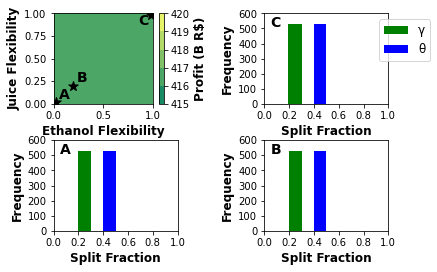

In [56]:
fig, axs = plt.subplots(2, 2)

#upper left - heat map
cntr = axs[0,0].contourf(ethanol_split_flex,juice_split_flex,df_profit_opt.to_numpy()/1e9, cmap='summer',levels=[415,416,417,418,419,420])
cbar=fig.colorbar(cntr, ax = axs[0,0])
axs[0,0].scatter(0.98,0.98,color = 'k', marker='*', s = 100)
# plt.scatter(0.5,0.5,color = 'k', marker='*', s = 100)
axs[0,0].scatter(0.2,0.2,color = 'k', marker='*', s = 100)
axs[0,0].scatter(0.02,0.02,color = 'k', marker='*', s = 100)
axs[0,0].text(0.05,0.06,'A', fontsize = 14, fontweight='bold')
axs[0,0].text(0.23,0.24,'B', fontsize = 14, fontweight='bold')
axs[0,0].text(0.85,0.87,'C', fontsize = 14, fontweight='bold')
axs[0,0].set_xlabel('Ethanol Flexibility', fontweight='bold', fontsize = 12)
axs[0,0].set_ylabel('Juice Flexibility', fontweight='bold', fontsize = 12)
cbar.set_label('Profit (B R$)',weight = 'bold', fontsize=12)

#Upper right
df_gamma_opt['10.10'] = df_gamma_opt['10.10'].drop(index=0)
df_theta_opt['10.10'] = df_theta_opt['10.10'].drop(index=0)
axs[0,1].hist(df_gamma_opt['10.10'], label='\u03B3',bins = [0.19,0.3], color = 'green')
axs[0,1].hist(df_theta_opt['10.10'],label='\u03B8', bins = 10, color = 'blue')
axs[0,1].text(0.05,510,'C', fontsize = 14, fontweight='bold')
axs[0,1].set_yticks([0,100,200,300,400,500,600])
axs[0,1].set_xlim(left = 0, right=1)
axs[0,1].set_xticks([0,0.2,.40,.60,.80,1])
axs[0,1].legend(bbox_to_anchor=(0.88, 1), fontsize = 12)
axs[0,1].set_xlabel('Split Fraction', fontweight='bold', fontsize = 12)
axs[0,1].set_ylabel('Frequency', fontweight='bold',fontsize = 12)

#Bottom left
df_gamma_opt['0'] = df_gamma_opt['0'].drop(index=0)
df_theta_opt['0'] = df_theta_opt['0'].drop(index=0)
axs[1,0].hist(df_gamma_opt['0'], label='Ethanol',bins = 10, color = 'green')
axs[1,0].hist(df_theta_opt['0'],label='Juice', bins = 10, color = 'blue')
axs[1,0].text(0.05,510,'A', fontsize = 14, fontweight='bold')
axs[1,0].set_yticks([0,100,200,300,400,500,600])
axs[1,0].set_xlim(left = 0, right=1)
axs[1,0].set_xticks([0,0.2,.40,.60,.80,1])
# axs[0,1].legend(bbox_to_anchor=(0.88, 1), fontsize = 10)
axs[1,0].set_xlabel('Split Fraction', fontweight='bold', fontsize = 12)
axs[1,0].set_ylabel('Frequency', fontweight='bold',fontsize = 12)

#Bottom right
df_gamma_opt['2.2'] = df_gamma_opt['2.2'].drop(index=0)
df_theta_opt['2.2'] = df_theta_opt['2.2'].drop(index=0)
axs[1,1].hist(df_gamma_opt['2.2'], label='Ethanol',bins = 10, color = 'green')
axs[1,1].hist(df_theta_opt['2.2'],label='Juice', bins = 10, color = 'blue')
axs[1,1].text(0.05,510,'B', fontsize = 14, fontweight='bold')
axs[1,1].set_yticks([0,100,200,300,400,500,600])
axs[1,1].set_xlim(left = 0, right=1)
axs[1,1].set_xticks([0,0.2,.40,.60,.80,1])
# axs[,1].legend(bbox_to_anchor=(0.88, 1), fontsize = 10)
axs[1,1].set_xlabel('Split Fraction', fontweight='bold', fontsize = 12)
axs[1,1].set_ylabel('Frequency', fontweight='bold',fontsize = 12)


plt.subplots_adjust(wspace = 0.7, hspace = 0.4)
plt.savefig('4panel_optimistic.png',bbox_inches='tight',dpi=400)
plt.show()